In [9]:
import pathlib
import sys
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB:
    # montar el drive, que es donde tenemos el dataset
    from google.colab import drive
    drive.mount("/content/drive")
    data_dir = "/content/drive/MyDrive/2023/Publica/Alumnos/opencv/imagenes/"
    sys.path.append(data_dir)
else:
    import os
    data_dir=str(pathlib.Path().resolve().parent)+"/imagenes/"

In [10]:
# en una imagen, sustituimos una zona segmentada por color por la parte correspondiente de un fondo

In [11]:
import cv2 as cv
import numpy as np

from matplotlib import pyplot as plt

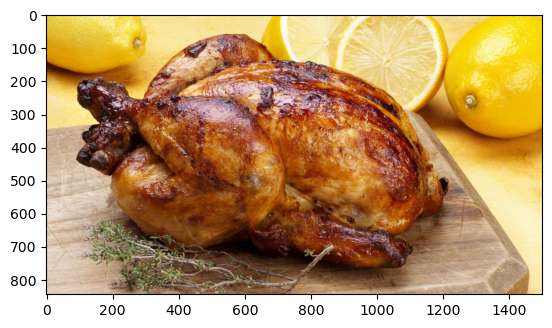

In [12]:
fondo = cv.imread(data_dir + "pollo.jpg")
fondo = cv.cvtColor(fondo, cv.COLOR_BGR2RGB)
plt.imshow(fondo)

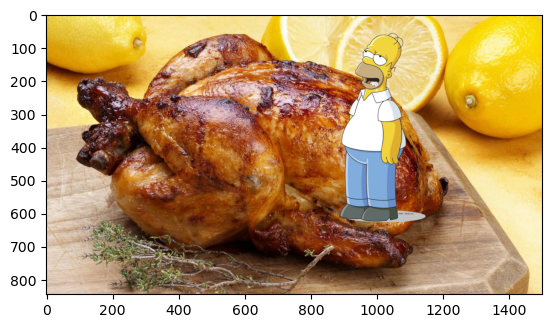

In [13]:
img = cv.imread(data_dir + "homer_pollo.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)


plt.imshow(img)


[[[105 105 220]]]


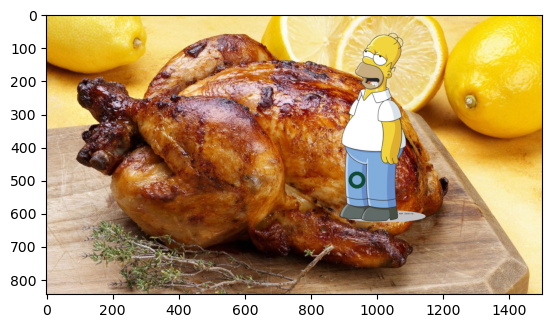

In [14]:
hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)
punto_muestra = np.array([940, 500])
y = 500
x = 940
h,s,v = hsv[y, x]
color_punto = np.uint8([[[h,s,v]]])
print(color_punto)

# el punto para recoger el color es el (940, 500)
img2 = img.copy()
cv.circle(img2, (940, 500), 20, (15,75,50), 10)

plt.imshow(img2)



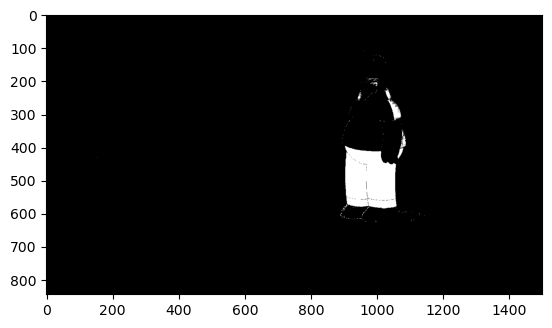

In [15]:
color_ini = np.array([color_punto[0,0,0] - 10, 10, 10])
color_end = np.array([color_punto[0,0,0] + 10, 255, 255])

mask = cv.inRange(hsv, color_ini, color_end)
plt.imshow(mask, cmap="gray")

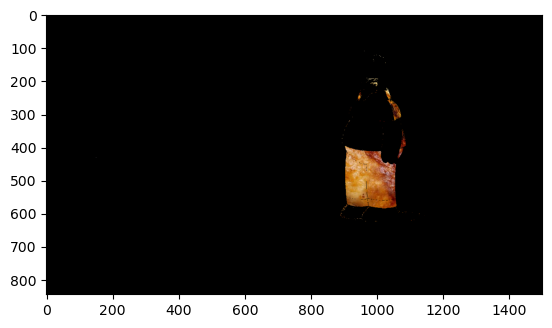

In [16]:
# tenemos una imagen de fondo(fondo), una del momento actual(img) y una máscara(mask)
# proceso:
# final =  (img AND (NOT mask)) OR (fondo AND mask)



#fondo AND mask

# mask y fondo tienen ditinto número de canales
fondo_and_mask = cv.bitwise_and(fondo, fondo, mask=mask)

# se podía haber hecho así, triplicando el número de canales de mask:
# mask2 = cv.merge([mask, mask, mask])
# fondo_and_mask = cv.bitwise_and(fondo, mask2)

plt.imshow(fondo_and_mask, cmap="gray")

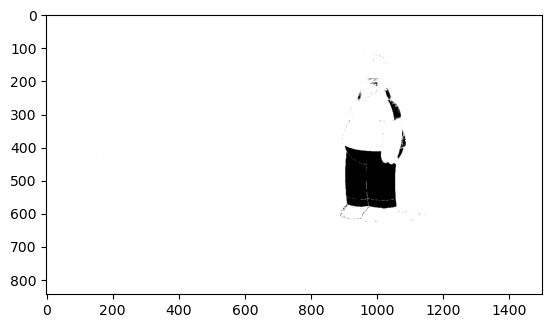

In [17]:
# not mask
not_mask = cv.bitwise_not(mask)
plt.imshow(not_mask, cmap="gray")

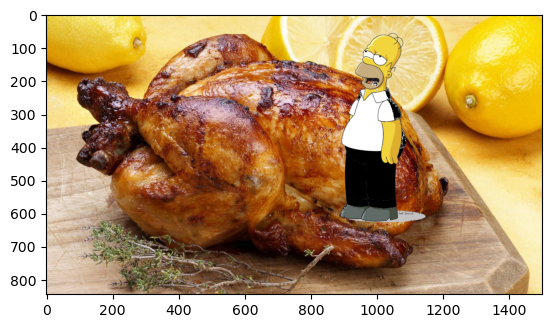

In [18]:
# imagen actual and no_mask
img_and_not_mask = cv.bitwise_and(img, img, mask=not_mask)
plt.imshow(img_and_not_mask, cmap="gray")

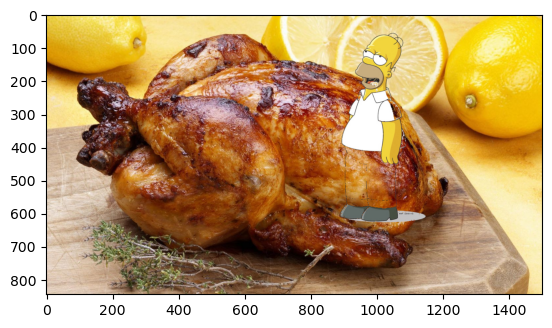

In [19]:
# ahora mezclamos esta imagen con la del fondo_con_mascara
img_and_not_mask__or__fondo_and_mask = cv.bitwise_or(img_and_not_mask, fondo_and_mask)
plt.imshow(img_and_not_mask__or__fondo_and_mask)